In [1]:
pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 1.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 1.2 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 1.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import geopandas as gpd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
import pandas as pd

municipality = gpd.read_file("/Users/Bijeta/Desktop/Data/municipality.shp")

In [10]:
municipality_geojson = gpd.read_file("/Users/Bijeta/Desktop/Data/municipality.geojson")

## Data information

#### Total number of municipalities

In [12]:
len(municipality)

775

In [13]:
municipality.head()

,PROVINCE,PR_NAME,DISTRICT,PALIKA,TYPE,geometry
0,1,Province No 1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,"POLYGON ((87.60985 27.37043, 87.61107 27.36943..."
1,1,Province No 1,TAPLEJUNG,Maiwakhola,Gaunpalika,"POLYGON ((87.50402 27.42901, 87.50672 27.42831..."
2,1,Province No 1,TAPLEJUNG,Meringden,Gaunpalika,"POLYGON ((87.51233 27.56818, 87.51196 27.56768..."
3,1,Province No 1,TAPLEJUNG,Mikwakhola,Gaunpalika,"POLYGON ((87.66620 27.73004, 87.66659 27.73000..."
4,1,Province No 1,TAPLEJUNG,Phaktanglung,Gaunpalika,"POLYGON ((87.83673 27.95137, 87.83735 27.95119..."


In [14]:
municipality.geom_type

0      Polygon
1      Polygon
2      Polygon
3      Polygon
4      Polygon
        ...   
770    Polygon
771    Polygon
772    Polygon
773    Polygon
774    Polygon
Length: 775, dtype: object

In [15]:
municipality.shape

(775, 6)

In [16]:
municipality.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Data Visualization

#### Municipalities of Nepal

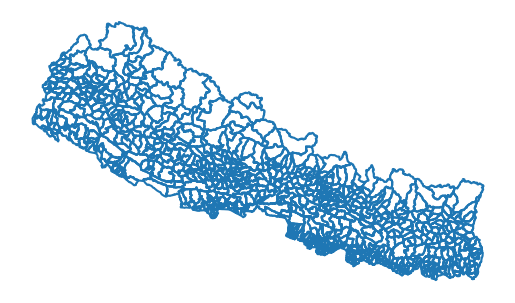

In [34]:
mb = municipality.boundary.plot()
mb.set_axis_off()

Municipalities by provinces

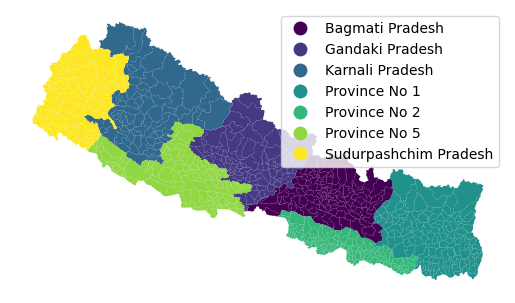

In [32]:
ax=municipality.plot("PR_NAME", cmap='viridis', legend = True)
ax.set_axis_off()

#### Writing Data

In [35]:
abc = gpd.read_file("/Users/Bijeta/Desktop/Data/municipality.shp")

In [36]:
abc.to_file("/Users/Bijeta/Desktop/Data/municipality_output.shp")

In [38]:
abc.to_file("/Users/Bijeta/Desktop/Data/municipality_output.geojson", driver="GeoJSON", encoding ="utf-8")

In [40]:
abc.to_file("/Users/Bijeta/Desktop/Data/municipality_output.gpkg", layer= 'palika', encoding ='utf-8')

#### Working with Attribute Data

Extracting specific attributes from the data set

In [44]:
kathmandu = municipality[municipality['DISTRICT']=='KATHMANDU']

Text(0.5, 1.0, 'Municipalities in Kathmandu')

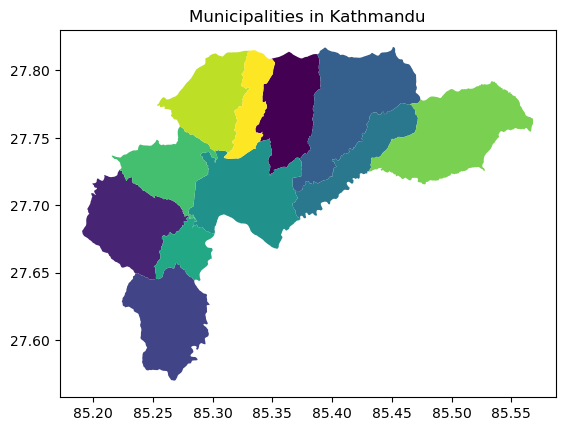

In [62]:
ktmpalika=kathmandu.plot("PALIKA", cmap='viridis')
ktmpalika.set_axis_off
plt.title("Municipalities in Kathmandu")

#### Number of Municipalities in a District

In [56]:
len(kathmandu)

11

In [106]:
lalitpur = municipality[municipality['DISTRICT']=='LALITPUR']
len(lalitpur)

6

#### Adding a Column with Areas of Municipalities

In [63]:
municipality1 = gpd.read_file("/Users/Bijeta/Desktop/Data/municipality.shp")

In [64]:
municipality1['area']=0

In [66]:
municipality_crs=municipality1.to_crs(epsg=32645) #Creating a coordinate reference systems of data

In [67]:
municipality_crs['area']=municipality_crs.geometry.area/10**6

In [69]:
municipality_crs.head()

,PROVINCE,PR_NAME,DISTRICT,PALIKA,TYPE,geometry,area
0,1,Province No 1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,"POLYGON ((560307.153 3027612.864, 560428.320 3...",88.521700
1,1,Province No 1,TAPLEJUNG,Maiwakhola,Gaunpalika,"POLYGON ((549815.446 3034054.303, 550082.592 3...",137.371061
2,1,Province No 1,TAPLEJUNG,Meringden,Gaunpalika,"POLYGON ((550573.020 3049473.152, 550537.274 3...",209.626709
3,1,Province No 1,TAPLEJUNG,Mikwakhola,Gaunpalika,"POLYGON ((565665.744 3067475.242, 565704.431 3...",441.435863
4,1,Province No 1,TAPLEJUNG,Phaktanglung,Gaunpalika,"POLYGON ((582308.234 3092096.983, 582369.345 3...",1851.420797


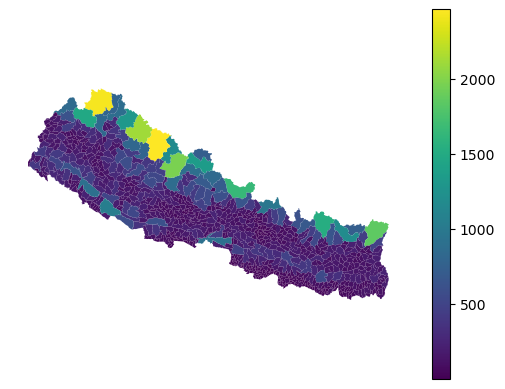

In [93]:
m_area=municipality_crs.plot('area', legend=True)
m_area.set_axis_off()

#### Municipalities Bigger Than 50 sq. km

In [113]:
municipality_50_km=municipality_crs[municipality_crs['area']>50]

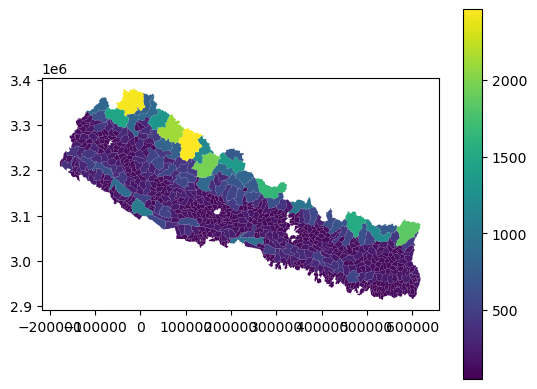

In [115]:
new_area=municipality_50_km.plot('area', legend=True)

#### Number of Municipalities Smaller Than 50 sq. km

In [121]:
small_municipalities = municipality_crs[municipality_crs['area'] < 50]
small_municipalities_count = small_municipalities['area'].tolist()
len(small_municipalities_count)

115

#### Visualizing Adjacent Districts

<Axes: >

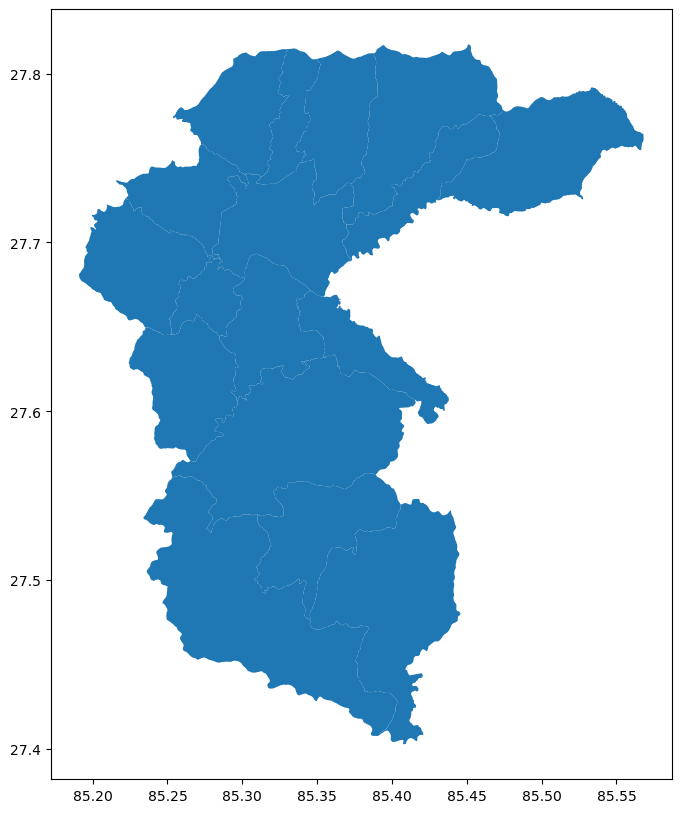

In [109]:
ax=kathmandu.plot(figsize=(10,10))
lalitpur.plot(ax=ax)

In [125]:
pip install folium matplotlib mapclassify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 3.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [126]:
import mapclassify
import folium
import matplotlib

In [131]:
kathmandu.explore(column='PALIKA', cmap='magma')